# Breast Cancer Analysis using Wisconsin (Diagnostic) Data Set

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


Initial standard steps

In [1]:
import kagglehub
import pandas as pd # to work with dataframes, manipulate data (panel data)
import matplotlib.pyplot as plt # viz library
import seaborn as sns # HD viz library
import numpy as np # to work with numbers (numerical python)
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
from scipy.stats import pearsonr

%matplotlib inline
pd.set_option('display.max_columns', None)

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

c:\ProgramData\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Vanuhi\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


In [2]:
data = pd.read_csv(r'C:\Users\Vanuhi\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2\data.csv')

df = data.copy()
# dropping the last col(filled with NaNs)
df.drop(columns="Unnamed: 32", inplace=True)


df.to_csv('cleaned_data.csv', index=False)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Attribute Information:

- ID number
- Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Initial exploration

In [3]:
df.shape

(569, 32)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.eq(" ").sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Frequency table for Malignant(M) vs Benign(B)

In [8]:
# getting absolute and relative counts for M and B
freq_mb = df['diagnosis'].value_counts()
prop_mb = df['diagnosis'].value_counts(normalize=True).round(2)

# renaming columns for the frequency table
freq_mb_complete = pd.concat([freq_mb, prop_mb], axis= 1)
freq_mb_complete.rename(columns={'count':'absolute_frequency','proportion':'relative_frequency'}, inplace=True)
freq_mb_complete

total_freq_mb = freq_mb.sum()
print(total_freq_mb)
total_prop_mb = prop_mb.sum()
print(total_prop_mb)

freq_mb_complete

# adding totals row
total_row = pd.DataFrame({'absolute_frequency': [total_freq_mb], 'relative_frequency': [total_prop_mb]}, index=['Total'])

freq_mb_complete = pd.concat([freq_mb_complete, total_row], axis=0)
freq_mb_complete


569
1.0


,absolute_frequency,relative_frequency
B,357,0.63
M,212,0.37
Total,569,1.00


## Heatmap of all numeric continous values

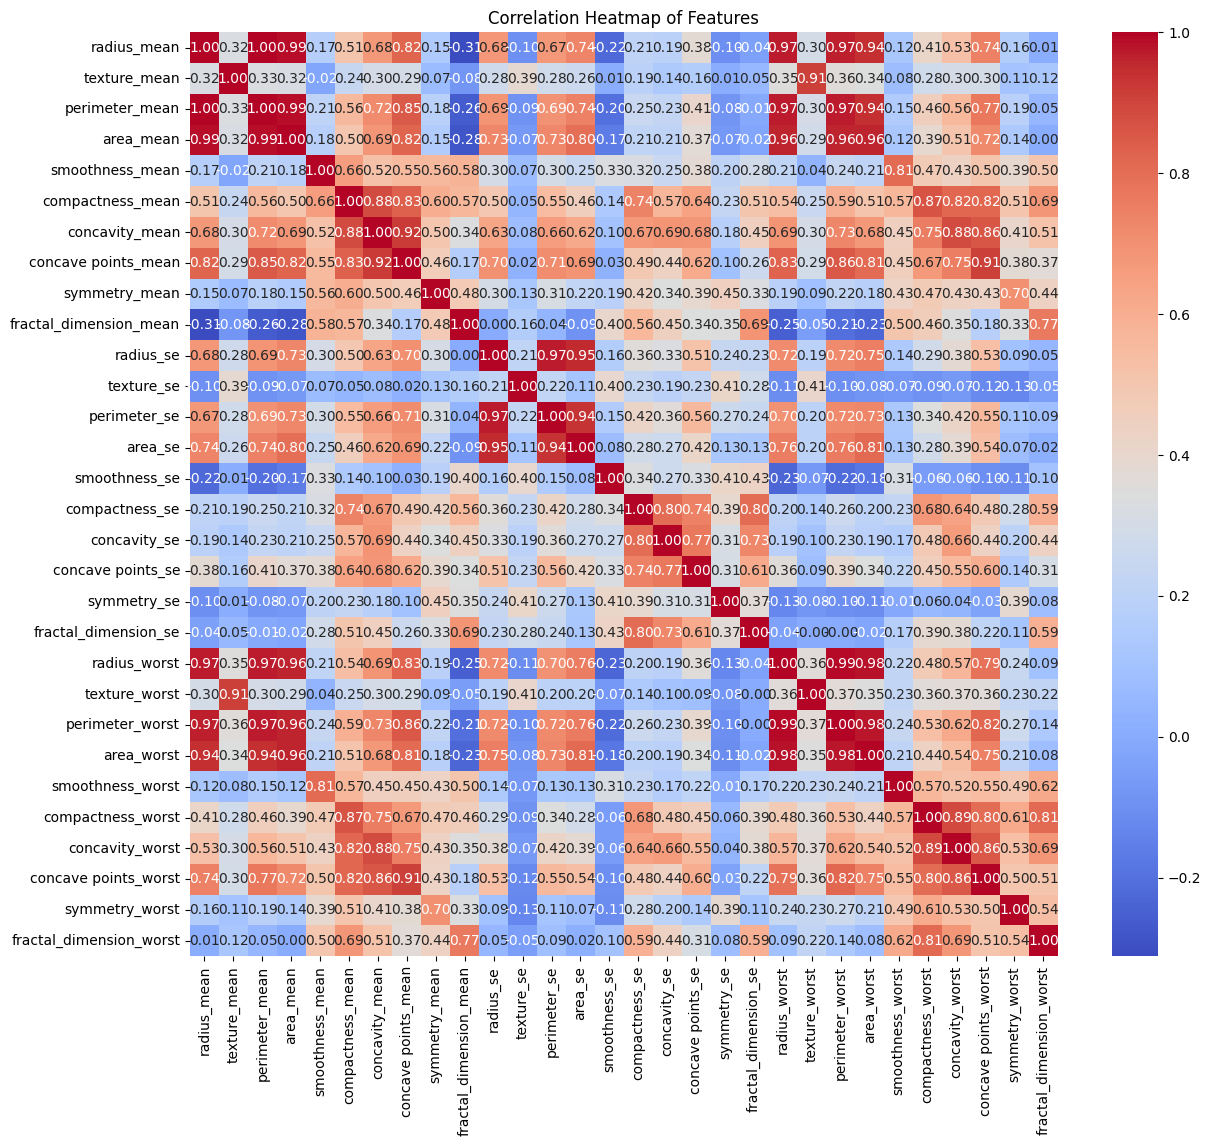

In [9]:
# dropping 'id' and 'diagnosis' - not meaningful for a correlation matrix
df_heat = df.drop(columns=['id', 'diagnosis'])

# correlation matrix for the numeric features
corr_matrix = df_heat.corr()

corr_matrix

#  heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.savefig('plots/corr_unfiltered.png')
plt.show()



Heatmap shows strong correlation between radius dependent metrics(area, perimeter) and radius itself, which allows to consider feature selection. On the other hand, such metrics as texture(mean, se) show lower correlation with others, which shows that this column provides unique information in comparison with those that largely overlap

### Heatmap with selected features:

In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

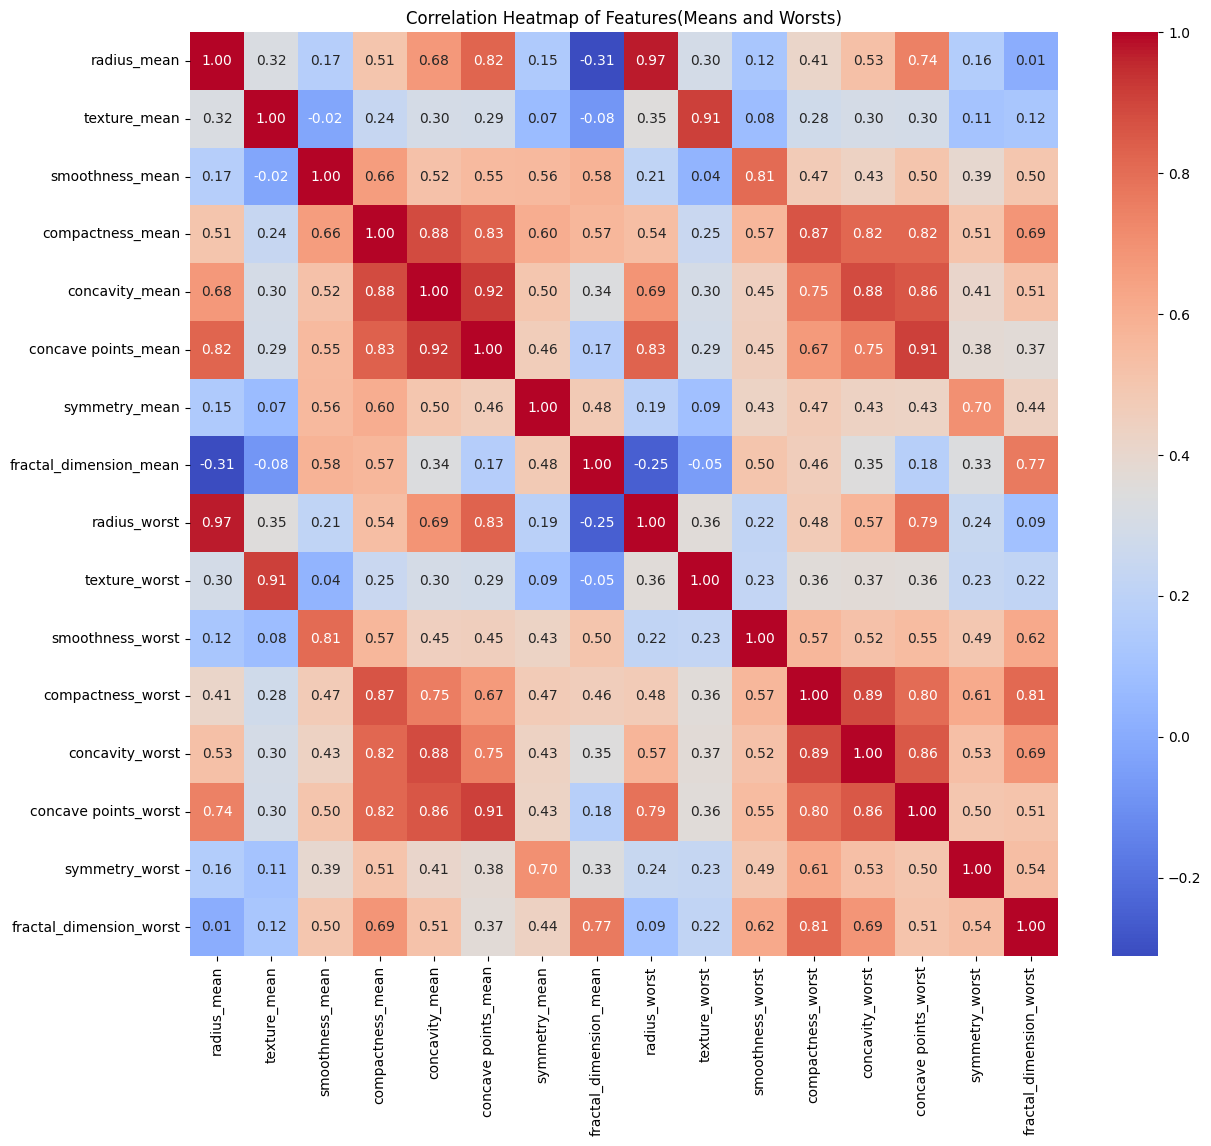

In [11]:
# dropping 'id' and 'diagnosis' - not meaningful for a correlation matrix, also excluded _se values
df_heat1 = df.drop(columns=['id', 'diagnosis', 'perimeter_mean',
       'area_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se','perimeter_worst', 'area_worst'])

# correlation matrix for the numeric features
corr_matrix = df_heat1.corr()

#  heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features(Means and Worsts)')
plt.savefig('plots/corr_filtered.png')
plt.show()


# Summarizing results of induvidual analysis of each metric

Included only metrics where p-value < 0.05 and Cramer V > 0.5. Based on this criteria, excluded fractal dimension, smoothness, symmetry and texture metrics

                        chi_values
compactness_mean      3.769454e-32
concave_points_worst  1.235543e-39
concavity_mean        2.022185e-48
radius_worst          1.394378e-26


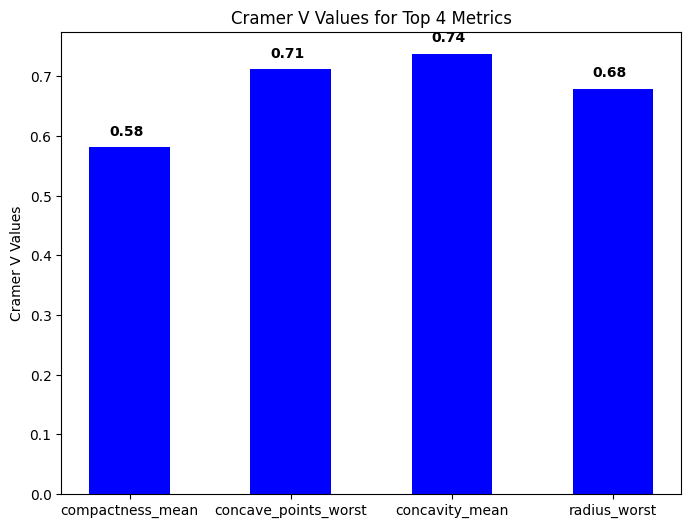

In [12]:
metrics = ['compactness_mean', 'concave_points_worst', 'concavity_mean', 'radius_worst']
chi_values = [3.7694541006106594e-32, 1.235542576364234e-39, 2.022185081770995e-48, 1.394378336723893e-26]
cramer_values = [0.5813766795517757,  0.7119599662792855, 0.7374721424144816, 0.679853961429309 ]

df_chi = pd.DataFrame(chi_values, index=metrics, columns=['chi_values'])
df_cramer = pd.DataFrame(cramer_values, index=metrics, columns=['cramer_values'])
print(df_chi)

x = np.arange(len(metrics))
width = 0.5  # width of the bars

# Plot 2: Cramer V Values
plt.figure(figsize=(8, 6))
plt.bar(x, cramer_values, width, color='blue')
plt.xticks(x, metrics)
plt.ylabel('Cramer V Values')
plt.title('Cramer V Values for Top 4 Metrics')
# adding value labels on top of bars
for i, value in enumerate(cramer_values):
    plt.text(x[i] - width/4, value + 0.02, f'{value:.2f}', fontweight='bold')
plt.show()


Identified top 4 metrics with the highest level of association and statistically significant correlation with diagnosis